#  Deep Q-Learning with an PongDeterministic-v0

Zeyuan Zhu 01519701

Environment:

* Windows10
* Pytorch 1.10.2
* Python 3.9.0
* GYM 0.17.0

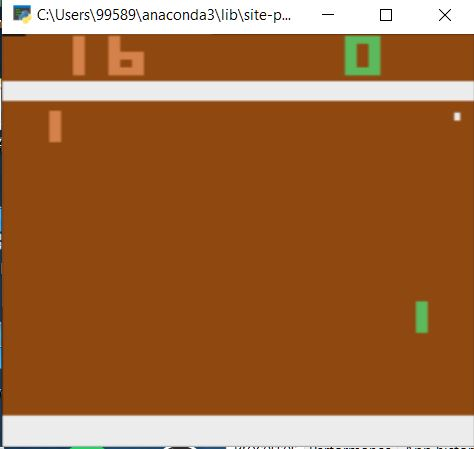

### 1. Establish a baseline performance. How well did your Deep Q-learning do on your problem? (5 Points)
For example

total_episodes = 400<br>
total_test_episodes = 400<br>
max_steps = 10000<br>
learning_rate = 0.00025<br>
gamma = 0.97<br>
epsilon = 1.0<br>
max_epsilon = 400<br>
min_epsilon = 1<br>
decay_rate = 0.01

### 2. What are the states, the actions, and the size of the Q-table? (5 Points)

**States:** The state describes the current situation, In the pong game it is the position of the 2 player and the ball.

**Actions:**  ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']. In which, 0 & 1 are staying, 2 & 4 make the green player go up/go up fire, and 3 & 5 make the green player go down/go down fire.<br>



**The size of the Q-table:** 

In this environment, the states has 210 * 160 pixels, and each pixel has 128 possible colors. So the size of the Q-table is 210 * 160* 6 = 201600.<br>


### 3. What are the rewards? Why did you choose them? (5 Points)

the reward is greean player's score - the red player's scores.<br>

Win and Lose is to rough to present the powerful or player, the score is better toshow the performance of module

### 4. How did you choose alpha and gamma in the Bellman equation? Try at least one additional value for alpha and gamma. How did it change the baseline performance? (5 Points)



Alpha is the learning rate that represents how important the learned Q-value is. The bigger the Alpha is, the more degree of reference to accept new Q-value.<br>
 
Gamma is the discount factor that represents how important the future/next Q-value is. Gamma bigger, which means higher discount rate.The bigger the Gamma is, Q-value for next state/future Q-value is more acceptable.


    GAMMA = 0.97  
    ALPHA = 0.00025  
    
In this experiment, The smaller learning rate performs better learning result. 


In this experiment, I changed the discount rate from 0.7 to 0.97. The bigger discount rate performs better learning result. 



### 5. Try a policy other than e-greedy. How did it change the baseline performance? (5 Points)

in my experment the performance of e-greedy are 0.2% better than baseline performance after all epsilon learning.


### 6. How did you choose your decay rate and starting epsilon? Try at least one additional value for epsilon and the decay rate. How did it change the baseline performance? What is the value of epsilon when if you reach the max steps per episode? (5 Points)

**How did you choose your decay rate and starting epsilon?**
2 decay rate=0.3 and 0.05.
2 starting epsilon 0.1 and 0.05

Deacy is hyperparameter with a large learning rate and then slowly reducing/decaying it until local minima is obtained. It is empirically observed to help both optimization and generalization.<br>

e-greedy algorithm. Determine the ratio of exploration to explode. The larger the epsilon, the more exploration the program will do

#### Try at least one additional value for epsilon and the decay rate. How did it change the baseline performance?
the performace with decay = 0.05 is better with decay = 0.1

#### What is the value of epsilon when if you reach the max steps per episode?
0.05



### 7. What is the average number of steps taken per episode? (5 Points)

 the average number of steps is 2221.15.
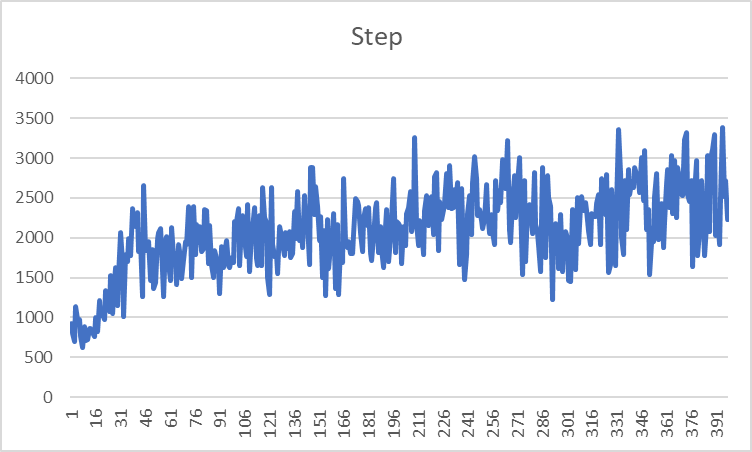


### 8. Does Q-learning use value-based or policy-based iteration? (5 Points) Explain, not a yes or no question. 

Q-learning uses value-based iteration.<br>

Because will choose next according by the largest Q-value

### 9. Could you use SARSA for this problem? (5 Points) Explain, not a yes or no question. 

Yes, we can use SARSA for this problem.<br>

Because SARSA algorithm is a slight variation of the popular Q-Learning algorithm.it is also calculating by using Q-table and e-greedy policy. It differs from Q-learning only in the method of updating the Q-value. So if Q-learning works for this problem, then SARSA also works for it.

### 10. What is meant by the expected lifetime value in the Bellman equation? (5 Points) 


#### Bellman equation:

Bellman equation is the basic block of solving reinforcement learning and is omnipresent in RL. It helps us to solve MDP. To solve means finding the optimal policy and value functions.It is the total max reward that could be got.

### 11. When would SARSA likely do better than Q-learning? (5 Points)

Q-learning is to obtain the optimal policy, while SARSA learns the near-optimal policy during exploration. And if there is a large negative reward close to the optimal path, Q-learning will tend to explore that, while SARSA is more like to exploit the previous policy. So when people prefer caring about the loss while training a model, SARSA will be better than Q-learning to exploit the previous data.

### 12. How does SARSA differ from Q-learning? (5 Points) Explain, not a yes or no question.

difference between the SARSA differ and Q-learning is how Q is updated after each action. SARSA uses the Q' following a ε-greedy policy exactly, as A' is drawn from it. In contrast, Q-learning uses the maximum Q' over all possible actions for the next step.

### 13. Explain the Q-learning algorithm. (5 Points) Details including pseudocode and math.

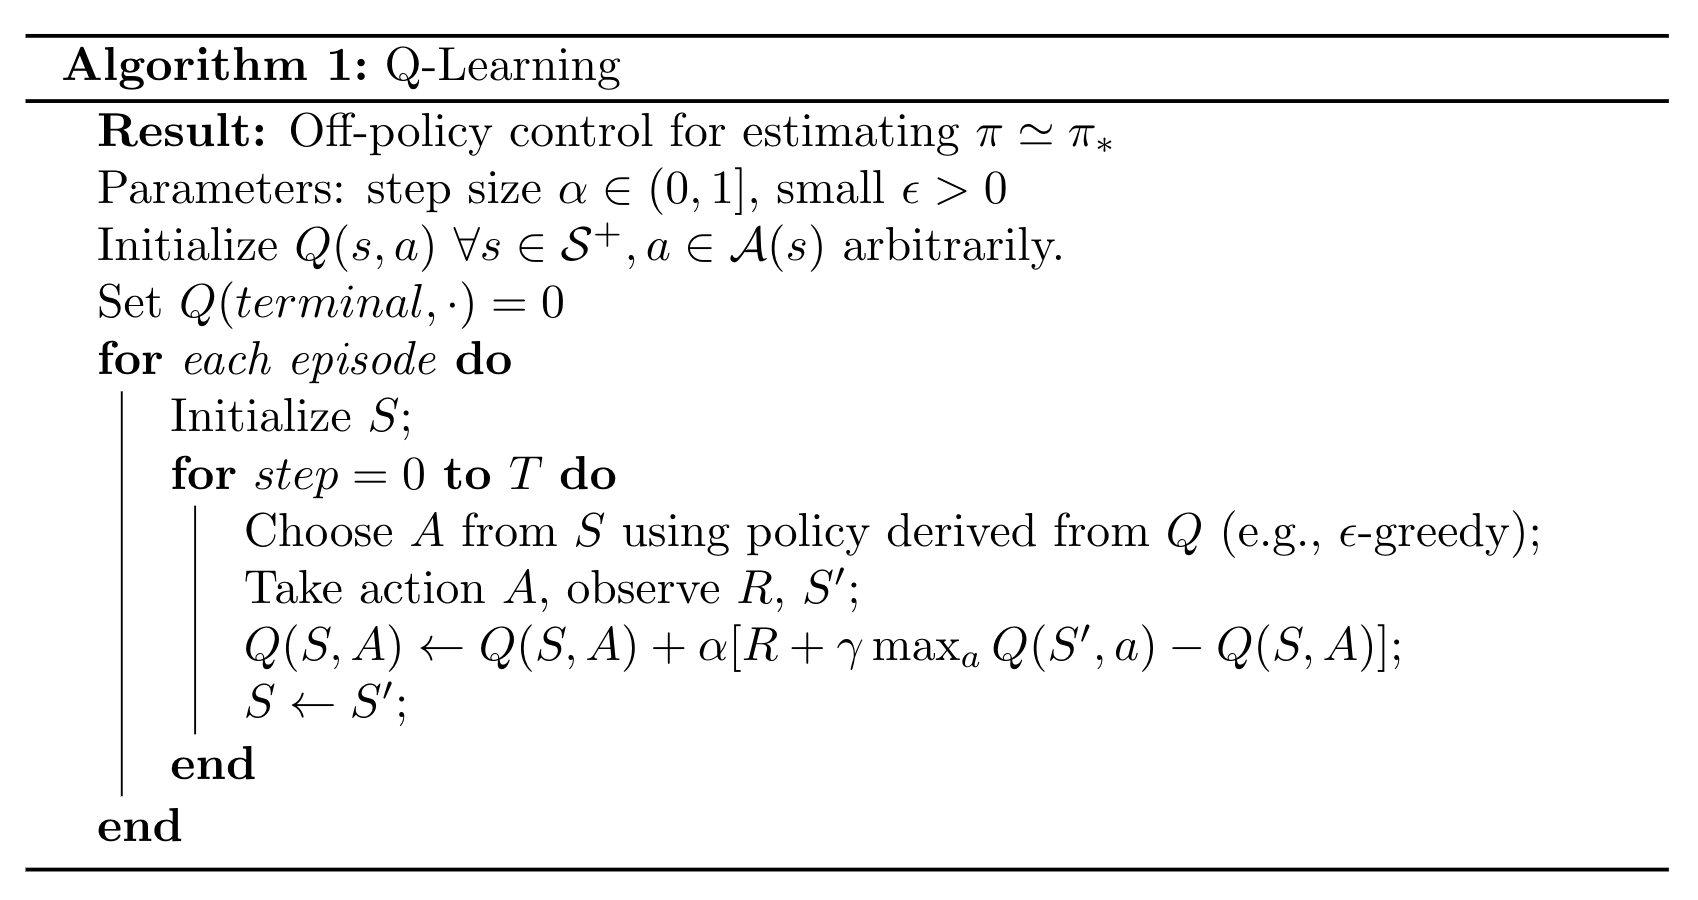

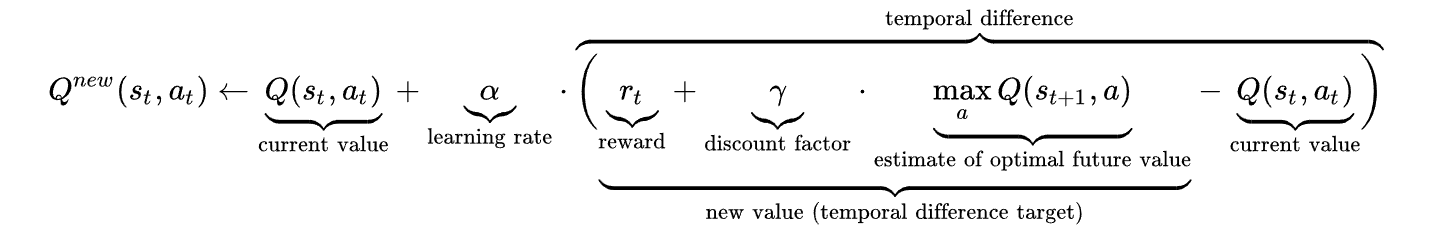

### 14. Explain the SARSA algorithm. (5 Points) Details including pseudocode and math. 

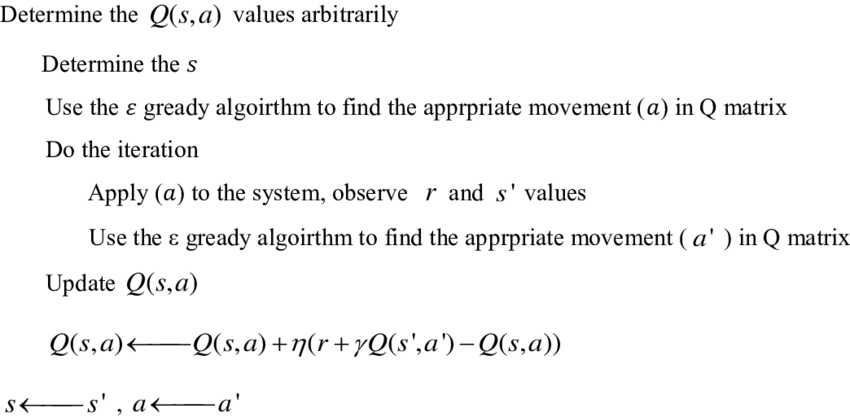

<br>
<br>

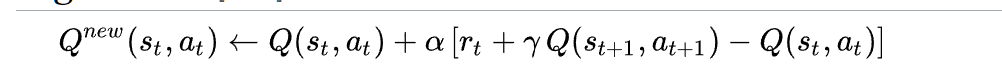

### 15. What code is yours and what have you adapted? (5 Points)

two class("class DuelCNN(nn.Module): classAgent:") are adapted from 
https://github.com/simoninithomas/Deep_reinforcement_learning_Course<br>

The setting of hyperparameters and result plot is mine 

### 16. Did I explain my code clearly? (10 Points) Your code review score will be scaled to a range of 0 to 10 and be used for this score.

Pleace check my explain in code block

### 17. Did I explain my licensing clearly? (5 Points) Failure to cite a clear license will result in a zero for this section.

    MIT License

    Copyright (c) 2022 Zeyuan ZHu

    Permission is hereby granted, free of charge, to any person obtaining a copy
    of this software and associated documentation files (the "Software"), to deal
    in the Software without restriction, including without limitation the rights
    to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
    copies of the Software, and to permit persons to whom the Software is
    furnished to do so, subject to the following conditions:

    The above copyright notice and this permission notice shall be included in all
    copies or substantial portions of the Software.

    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
    IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
    FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
    AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
    LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
    OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
    SOFTWARE.


In [1]:
import gym
import cv2
import time
import json
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque

In [2]:
ENVIRONMENT = "PongDeterministic-v0"
temp_env = gym.make(ENVIRONMENT)

print(temp_env.observation_space)
print(temp_env.action_space)
print(temp_env.env.get_action_meanings())

Box(210, 160, 3)
Discrete(6)
['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


In [7]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

SAVE_MODELS = True  # Save models to file so you can test later
MODEL_PATH = "./models/optimal/LRandDR/pong-LRandDR-"  # Models path for saving or loading
SAVE_MODEL_INTERVAL = 10  # Save models at every X epoch
TRAIN_MODEL = True  # Train model while playing (Make it False when testing a model)

LOAD_MODEL_FROM_FILE = False  # Load model from file
LOAD_FILE_EPISODE = 285  # Load Xth episode from file

BATCH_SIZE = 64  # Minibatch size that select randomly from mem for train nets
# MAX_EPISODE = 5000  # Max episode
MAX_EPISODE = 400  # Max episode
MAX_STEP = 10000  # Max step size for one episode

MAX_MEMORY_LEN = 40000  # Max memory len
MIN_MEMORY_LEN = 6000  # Min memory len before start train

# GAMMA = 0.8  # Old Discount rate
GAMMA = 0.97  # New Discount rate
# ALPHA = 0.7  # Old Learning rate
ALPHA = 0.00025  # New Learning rate
EPSILON_DECAY = 0.99  # Epsilon decay rate by step
# EPSILON_DECAY = 1  # Epsilon decay rate by step

RENDER_GAME_WINDOW = True  # Opens a new window to render the game (Won't work on colab default)

In [8]:
class DuelCNN(nn.Module):
    """
    CNN with Duel Algo. https://arxiv.org/abs/1511.06581
    """
    def __init__(self, h, w, output_size):
        super(DuelCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=4,  out_channels=32, kernel_size=8, stride=4)
        self.bn1 = nn.BatchNorm2d(32)
        convw, convh = self.conv2d_size_calc(w, h, kernel_size=8, stride=4)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2)
        self.bn2 = nn.BatchNorm2d(64)
        convw, convh = self.conv2d_size_calc(convw, convh, kernel_size=4, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1)
        self.bn3 = nn.BatchNorm2d(64)
        convw, convh = self.conv2d_size_calc(convw, convh, kernel_size=3, stride=1)

        linear_input_size = convw * convh * 64  # Last conv layer's out sizes

        # Action layer
        self.Alinear1 = nn.Linear(in_features=linear_input_size, out_features=128)
        self.Alrelu = nn.LeakyReLU()  # Linear 1 activation funct
        self.Alinear2 = nn.Linear(in_features=128, out_features=output_size)

        # State Value layer
        self.Vlinear1 = nn.Linear(in_features=linear_input_size, out_features=128)
        self.Vlrelu = nn.LeakyReLU()  # Linear 1 activation funct
        self.Vlinear2 = nn.Linear(in_features=128, out_features=1)  # Only 1 node

    def conv2d_size_calc(self, w, h, kernel_size=5, stride=2):
        """
        Calcs conv layers output image sizes
        """
        next_w = (w - (kernel_size - 1) - 1) // stride + 1
        next_h = (h - (kernel_size - 1) - 1) // stride + 1
        return next_w, next_h

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))

        x = x.view(x.size(0), -1)  # Flatten every batch

        Ax = self.Alrelu(self.Alinear1(x))
        Ax = self.Alinear2(Ax)  # No activation on last layer

        Vx = self.Vlrelu(self.Vlinear1(x))
        Vx = self.Vlinear2(Vx)  # No activation on last layer

        q = Vx + (Ax - Ax.mean())

        return q

In [9]:
class Agent:
    def __init__(self, environment):
        """
        Hyperparameters definition for Agent
        """
        # State size for breakout env. SS images (210, 160, 3). Used as input size in network
        self.state_size_h = environment.observation_space.shape[0]
        self.state_size_w = environment.observation_space.shape[1]
        self.state_size_c = environment.observation_space.shape[2]

        # Activation size for breakout env. Used as output size in network
        self.action_size = environment.action_space.n

        # Image pre process params
        self.target_h = 80  # Height after process
        self.target_w = 64  # Widht after process

        self.crop_dim = [20, self.state_size_h, 0, self.state_size_w]  # Cut 20 px from top to get rid of the score table

        # Trust rate to our experiences
        self.gamma = GAMMA  # Discount coef for future predictions
        self.alpha = ALPHA  # Learning Rate

        # After many experinces epsilon will be 0.05
        # So we will do less Explore more Exploit
        self.epsilon = 1  # Explore or Exploit
        self.epsilon_decay = EPSILON_DECAY  # Adaptive Epsilon Decay Rate
        self.epsilon_minimum = 0.05  # Minimum for Explore

        # Deque holds replay mem.
        self.memory = deque(maxlen=MAX_MEMORY_LEN)

        # Create two model for DDQN algorithm
        self.online_model = DuelCNN(h=self.target_h, w=self.target_w, output_size=self.action_size).to(DEVICE)
        self.target_model = DuelCNN(h=self.target_h, w=self.target_w, output_size=self.action_size).to(DEVICE)
        self.target_model.load_state_dict(self.online_model.state_dict())
        self.target_model.eval()

        # Adam used as optimizer
        self.optimizer = optim.Adam(self.online_model.parameters(), lr=self.alpha)

    def preProcess(self, image):
        """
        Process image crop resize, grayscale and normalize the images
        """
        frame = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # To grayscale
        frame = frame[self.crop_dim[0]:self.crop_dim[1], self.crop_dim[2]:self.crop_dim[3]]  # Cut 20 px from top
        frame = cv2.resize(frame, (self.target_w, self.target_h))  # Resize
        frame = frame.reshape(self.target_w, self.target_h) / 255  # Normalize

        return frame

    def act(self, state):
        """
        Get state and do action
        Two option can be selectedd if explore select random action
        if exploit ask nnet for action
        """

        act_protocol = 'Explore' if random.uniform(0, 1) <= self.epsilon else 'Exploit'

        if act_protocol == 'Explore':
            action = random.randrange(self.action_size)
        else:
            with torch.no_grad():
                state = torch.tensor(state, dtype=torch.float, device=DEVICE).unsqueeze(0)
                q_values = self.online_model.forward(state)  # (1, action_size)
                action = torch.argmax(q_values).item()  # Returns the indices of the maximum value of all elements

        return action

    def train(self):
        """
        Train neural nets with replay memory
        returns loss and max_q val predicted from online_net
        """
        if len(agent.memory) < MIN_MEMORY_LEN:
            loss, max_q = [0, 0]
            return loss, max_q
        # We get out minibatch and turn it to numpy array
        state, action, reward, next_state, done = zip(*random.sample(self.memory, BATCH_SIZE))

        # Concat batches in one array
        # (np.arr, np.arr) ==> np.BIGarr
        state = np.concatenate(state)
        next_state = np.concatenate(next_state)

        # Convert them to tensors
        state = torch.tensor(state, dtype=torch.float, device=DEVICE)
        next_state = torch.tensor(next_state, dtype=torch.float, device=DEVICE)
        action = torch.tensor(action, dtype=torch.long, device=DEVICE)
        reward = torch.tensor(reward, dtype=torch.float, device=DEVICE)
        done = torch.tensor(done, dtype=torch.float, device=DEVICE)

        # Make predictions
        state_q_values = self.online_model(state)
        next_states_q_values = self.online_model(next_state)
        next_states_target_q_values = self.target_model(next_state)

        # Find selected action's q_value
        selected_q_value = state_q_values.gather(1, action.unsqueeze(1)).squeeze(1)
        # Get indice of the max value of next_states_q_values
        # Use that indice to get a q_value from next_states_target_q_values
        # We use greedy for policy So it called off-policy
        next_states_target_q_value = next_states_target_q_values.gather(
            1, next_states_q_values.max(1)[1].unsqueeze(1)).squeeze(1)
        # Use Bellman function to find expected q value
        expected_q_value = reward + self.gamma * next_states_target_q_value * (1 - done)

        # Calc loss with expected_q_value and q_value
        loss = (selected_q_value - expected_q_value.detach()).pow(2).mean()

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss, torch.max(state_q_values).item()

    def storeResults(self, state, action, reward, nextState, done):
        """
        Store every result to memory
        """
        self.memory.append([state[None, :], action, reward, nextState[None, :], done])

    def adaptiveEpsilon(self):
        """
        Adaptive Epsilon means every step
        we decrease the epsilon so we do less Explore
        """
        if self.epsilon > self.epsilon_minimum:
            self.epsilon *= self.epsilon_decay

In [12]:
if __name__ == "__main__":
    environment = gym.make(ENVIRONMENT)  # Get env
    agent = Agent(environment)  # Create Agent

    if LOAD_MODEL_FROM_FILE:
        agent.online_model.load_state_dict(torch.load(MODEL_PATH+str(LOAD_FILE_EPISODE)+".pkl"))

        with open(MODEL_PATH+str(LOAD_FILE_EPISODE)+'.json') as outfile:
            param = json.load(outfile)
            agent.epsilon = param.get('epsilon')

        startEpisode = LOAD_FILE_EPISODE + 1

    else:
        startEpisode = 1

    last_100_ep_reward = deque(maxlen=100)  # Last 100 episode rewards
    total_step = 1  # Cumulkative sum of all steps in episodes
    for episode in range(startEpisode, MAX_EPISODE):

        startTime = time.time()  # Keep time
        state = environment.reset()  # Reset env

        state = agent.preProcess(state)  # Process image

        # Stack state . Every state contains 4 time contionusly frames
        # We stack frames like 4 channel image
        state = np.stack((state, state, state, state))

        total_max_q_val = 0  # Total max q vals
        total_reward = 0  # Total reward for each episode
        total_loss = 0  # Total loss for each episode
        
        # flag = 0
        
        # print(len(agent.memory))
        for step in range(MAX_STEP):

            if RENDER_GAME_WINDOW:
                environment.render()  # Show state visually

            # Select and perform an action
            action = agent.act(state)  # Act
            next_state, reward, done, info = environment.step(action)  # Observe

            next_state = agent.preProcess(next_state)  # Process image

            # Stack state . Every state contains 4 time contionusly frames
            # We stack frames like 4 channel image
            next_state = np.stack((next_state, state[0], state[1], state[2]))

            # Store the transition in memory
            agent.storeResults(state, action, reward, next_state, done)  # Store to mem

            # Move to the next state
            state = next_state  # Update state

            if TRAIN_MODEL:
                # Perform one step of the optimization (on the target network)
                loss, max_q_val = agent.train()  # Train with random BATCH_SIZE state taken from mem
            else:
                loss, max_q_val = [0, 0]

            total_loss += loss
            total_max_q_val += max_q_val
            total_reward += reward
            total_step += 1
            if total_step % 100 == 0:
                agent.adaptiveEpsilon()  # Decrase epsilon
                
#             if done == False:
#                 flag = flag + 1
#             else:
#                 print("True!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

            if done:  # Episode completed
                currentTime = time.time()  # Keep current time
                time_passed = currentTime - startTime  # Find episode duration
                current_time_format = time.strftime("%H:%M:%S", time.gmtime())  # Get current dateTime as HH:MM:SS
                epsilonDict = {'epsilon': agent.epsilon}  # Create epsilon dict to save model as file

                if SAVE_MODELS and episode % SAVE_MODEL_INTERVAL == 0:  # Save model as file
                    weightsPath = MODEL_PATH + str(episode) + '.pkl'
                    epsilonPath = MODEL_PATH + str(episode) + '.json'

                    torch.save(agent.online_model.state_dict(), weightsPath)
                    with open(epsilonPath, 'w') as outfile:
                        json.dump(epsilonDict, outfile)

                if TRAIN_MODEL:
                    agent.target_model.load_state_dict(agent.online_model.state_dict())  # Update target model

                last_100_ep_reward.append(total_reward)
                avg_max_q_val = total_max_q_val / step

                outStr = "Episode:{} Time:{} Reward:{:.2f} Loss:{:.2f} Last_100_Avg_Rew:{:.3f} Avg_Max_Q:{:.3f} Epsilon:{:.2f} Duration:{:.2f} Step:{} CStep:{}".format(
                    episode, current_time_format, total_reward, total_loss, np.mean(last_100_ep_reward)
                    , avg_max_q_val, agent.epsilon, time_passed, step, total_step
                )

                print(outStr)
                #flag = 0

                if SAVE_MODELS:
                    outputPath = MODEL_PATH + "out" + '.txt'  # Save outStr to file
                    with open(outputPath, 'a') as outfile:
                        outfile.write(outStr+"\n")

                break

KeyboardInterrupt: 

### Result

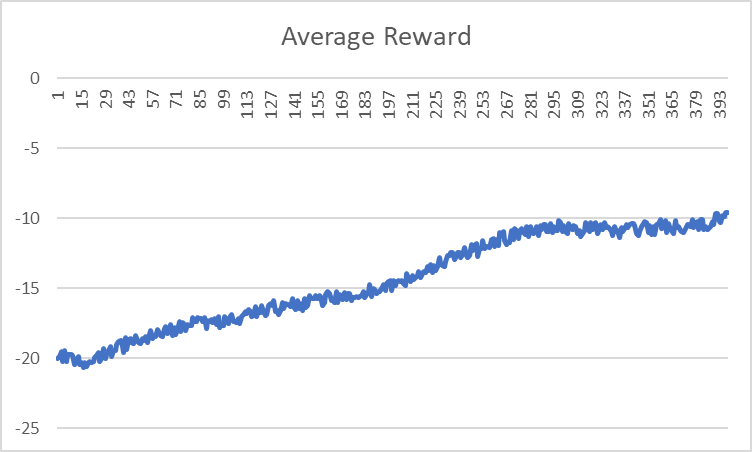

**The Final Extraction and Post-Processing part:**

In [ ]:
reward = []
ave_reward = []
step = []
with open('./models/optimal/LRandDR/pong-LRandDR-out.txt','r') as f:
    for l in f.readlines():
        l = l.split(":")
        reward.append(l[5].split(" ")[0])
        ave_reward.append(l[7].split(" ")[0])
        step.append(l[11].split(" ")[0])
        
with open('result-random.csv','w+') as f:
    f.write("Reward,Average Reward,Steps\n")
    for i in range(0,len(reward)-1):
        f.write(reward[i]+","+ave_reward[i]+","+step[i]+"\n")

### Referance:
https://en.wikipedia.org/wiki/State%E2%80%93action%E2%80%93reward%E2%80%93state%E2%80%93action<br>
https://en.wikipedia.org/wiki/Q-learning<br>
https://www.gymlibrary.dev/<br>
https://github.com/simoninithomas/Deep_reinforcement_learning_Course<br>
https://github.com/simoninithomas/Deep_reinforcement_learning_Course<br>
http://www.atarimania.com/rom_collection_archive_atari_2600_roms.html